# **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# **Importing the Dataset file**


In [2]:
df=pd.read_csv('/content/dataset.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.type.value_counts()

In [ ]:
type=df['type'].value_counts()

In [ ]:
transactions=type.index

In [ ]:
df.info()

# **Data Representation through Pie chart and bar graph**

In [ ]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
transaction=type.index

In [ ]:
quantity=type.values

In [ ]:
import plotly.express as px


fig = px.bar(df, x=transaction, y=quantity, title="Distribution of transaction type")
fig.update_layout(
    xaxis_title="Transaction Type",
    yaxis_title="Quantity",
    barmode='group',
)
fig.show()


In [ ]:
import plotly.express as px
fig = px.pie(df, values=quantity, names= transaction , title='Pie Chart of Transaction Type',)
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value+percent',
    textfont_size=12,
    marker=dict(colors=px.colors.qualitative.Set3),
)
fig.show()


In [ ]:
df=df.dropna()

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0


In [ ]:
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,1,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0
28292,8,1,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,1,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,1,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0


In [ ]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [ ]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,No Fraud,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,No Fraud,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,Fraud,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,Fraud,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,No Fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,1,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,No Fraud,0.0
28292,8,1,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,No Fraud,0.0
28293,8,1,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,No Fraud,0.0
28294,8,1,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,No Fraud,0.0


In [ ]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [ ]:
y=df.iloc[:,-2]

In [ ]:
y

NameError: ignored

# **Undersampling** **Dataset**

In [ ]:
normal=df[df['isFraud']=='No Fraud']

In [ ]:
normal.shape

(28212, 11)

In [ ]:
fraudulent=df[df['isFraud']=="Fraud"]

In [ ]:
fraudulent.shape

(84, 11)

In [ ]:
normal_sample=normal.sample(n=84)

In [ ]:
normal_sample.shape

(84, 11)

In [ ]:
new_data = pd.concat([normal_sample,fraudulent],ignore_index=True)

In [ ]:
new_data['isFraud'].value_counts()

No Fraud    84
Fraud       84
Name: isFraud, dtype: int64

In [ ]:
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,6,2,121.57,C516913231,0.00,0.00,M877095353,0.0,0.0,No Fraud,0.0
1,8,2,13087.59,C1839401776,0.00,0.00,M2052750222,0.0,0.0,No Fraud,0.0
2,8,2,1992.72,C1346941186,201526.92,199534.20,M1178751818,0.0,0.0,No Fraud,0.0
3,1,2,1730.16,C1848163207,0.00,0.00,M435175610,0.0,0.0,No Fraud,0.0
4,8,2,32057.34,C1701503697,97670.30,65612.96,M347906624,0.0,0.0,No Fraud,0.0


In [ ]:
x=new_data[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [ ]:
y=y=new_data.iloc[:,-2]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
y_pred1=log.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,y_pred1)

0.9705882352941176

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(ytest,y_pred1,pos_label="Fraud")

0.9333333333333333

In [ ]:
recall_score(ytest,y_pred1,pos_label="Fraud")

1.0

In [ ]:
f1_score(ytest,y_pred1,pos_label="Fraud")

0.9655172413793104

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
y_pred2 =dt.predict(xtest)

In [ ]:
accuracy_score(ytest,y_pred2)

0.9705882352941176

In [ ]:
precision_score(ytest,y_pred2,pos_label="Fraud")

0.9333333333333333

In [ ]:
recall_score(ytest,y_pred2,pos_label="Fraud")

1.0

In [ ]:
f1_score(ytest,y_pred2,pos_label="Fraud")

0.9655172413793104

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
y_pred3 =dt.predict(xtest)

In [ ]:
accuracy_score(ytest,y_pred3)

0.9705882352941176

In [ ]:
precision_score(ytest,y_pred3,pos_label="Fraud")

0.9333333333333333

In [ ]:
recall_score(ytest,y_pred2,pos_label="Fraud")

1.0

In [ ]:
f1_score(ytest,y_pred2,pos_label="Fraud")

0.9655172413793104

In [ ]:
pd.DataFrame({"Models":['LR','DT','RF'],'ACC':[accuracy_score(ytest,y_pred1)*100
                                               ,accuracy_score(ytest,y_pred2)*100
                                               ,accuracy_score(ytest,y_pred3)*100]})

,Models,ACC
0,LR,97.058824
1,DT,97.058824
2,RF,97.058824


In [ ]:
final_data=pd.DataFrame({"Models":['LR','DT','RF'],'ACC':[accuracy_score(ytest,y_pred1)*100
                                               ,accuracy_score(ytest,y_pred2)*100
                                               ,accuracy_score(ytest,y_pred3)*100]})

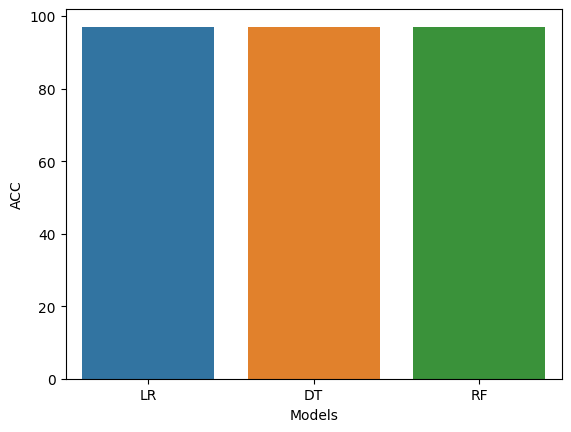

In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data)
plt.show()

# **Oversampling**

In [ ]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y=df.iloc[:,-2]

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

No Fraud    28212
Fraud       28212
Name: isFraud, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression after oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
y_pred1=log.predict(xtest)

In [ ]:
accuracy_score(ytest,y_pred1)

0.9969964664310954

In [ ]:
precision_score(ytest,y_pred1,pos_label="Fraud")

0.6666666666666666

In [ ]:
recall_score(ytest,y_pred1,pos_label="Fraud")

0.1111111111111111

# RandomForest after oversampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
y_pred3 =dt.predict(xtest)

In [ ]:
accuracy_score(ytest,y_pred3)

0.9120141342756184

# DecisionTreeClassifier after oversampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
y_pred2 =dt.predict(xtest)

In [ ]:
accuracy_score(ytest,y_pred2)

0.9968197879858657

In [ ]:
pd.DataFrame({"Models":['LR','DT','RF'],'ACC':[accuracy_score(ytest,y_pred1)*100
                                               ,accuracy_score(ytest,y_pred2)*100
                                               ,accuracy_score(ytest,y_pred3)*100]})

,Models,ACC
0,LR,99.699647
1,DT,99.681979
2,RF,91.201413


In [ ]:
final_data1=pd.DataFrame({"Models":['LR','DT','RF'],'ACC':[accuracy_score(ytest,y_pred1)*100
                                               ,accuracy_score(ytest,y_pred2)*100
                                               ,accuracy_score(ytest,y_pred3)*100]})

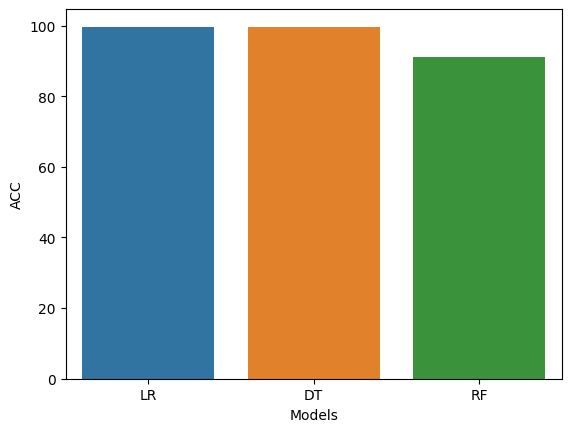

In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data1)
plt.show()

In [ ]:
dt.predict([[4,181,181,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['Fraud'], dtype=object)

# **Save the model**

In [ ]:
log1=LogisticRegression()
log1.fit(x_res,y_res)

LogisticRegression()

In [ ]:
import joblib

In [ ]:
joblib.dump(log1,"online_transaction_model")

['online_transaction_model']

In [ ]:
model=joblib.load('online_transaction_model')

In [ ]:
pred=model.predict([[4,181,181,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
if(pred=="No Fraud"):
  print("Normal Transaction")
else:
  print("Fraudulent Transaction")

Fraudulent Transaction


In [ ]:
import pickle
with open('online_transaction_model','wb') as model_file:
  pickle.dump(model,model_file,protocol=2)